**Introduction to RNNs**


- Basically RNNs use Truncated BackPropagation through Time(TBTT),what actaully it means is that "it is having H timestamps, that for every H time stamp, previous time stamp information will be preserved so that for the single update it will not go through all the iterations" this is the idea behind LSTM(Long Short Term Memory)

-https://colah.github.io/posts/2015-08-Understanding-LSTMs/


***Develop LSTM Models For Univariate Time Series Forecasting***

In [27]:
import numpy as np
from tensorflow.keras.models import Sequential    #Here Sequential groups linear stack of layers into groups
from tensorflow.keras.layers import Dense         # Densely connected NeuralNetwork Layer
from tensorflow.keras.layers import LSTM  
from tensorflow.keras.layers import Flatten       

In [28]:
def Preparing_data(data,n_features):
    X,y=[],[]
    for i in range(len(data)-1):
        end_elmt=i+n_features
        if (end_elmt > len(data)-1):
            break
        X1,y1=data[i:end_elmt],data[end_elmt]
        X.append(X1)
        y.append(y1)
    return np.array(X),np.array(y)

In [29]:
# Let us have the input time series data

data=[110,125,133,146,158,172,187,196,210]

n_features=3

# Split into samples
X,y=Preparing_data(data,n_features)

In [30]:
X

array([[110, 125, 133],
       [125, 133, 146],
       [133, 146, 158],
       [146, 158, 172],
       [158, 172, 187],
       [172, 187, 196]])

In [31]:
y

array([146, 158, 172, 187, 196, 210])

In [32]:
X.shape

(6, 3)

In [33]:
# reshape from [samples,timesteps] into [smaples,timesteps,features]
n_feature=1
X=X.reshape(X.shape[0],X.shape[1],n_feature)

***Building LSTM Model***

In [34]:
# define model

model=Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(n_features,n_feature)))
model.add(LSTM(50,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')
model.fit(X,y,epochs=400,verbose=1)


Epoch 1/400
6/6 [==============================] - 2s 386ms/sample - loss: 32116.3359
Epoch 2/400
6/6 [==============================] - 0s 997us/sample - loss: 31885.7246
Epoch 3/400
6/6 [==============================] - 0s 1ms/sample - loss: 31651.0566
Epoch 4/400
6/6 [==============================] - 0s 1ms/sample - loss: 31437.5469
Epoch 5/400
6/6 [==============================] - 0s 1ms/sample - loss: 31238.7715
Epoch 6/400
6/6 [==============================] - 0s 1ms/sample - loss: 31047.3047
Epoch 7/400
6/6 [==============================] - 0s 2ms/sample - loss: 30864.5059
Epoch 8/400
6/6 [==============================] - 0s 1ms/sample - loss: 30661.6875
Epoch 9/400
6/6 [==============================] - 0s 2ms/sample - loss: 30422.8809
Epoch 10/400
6/6 [==============================] - 0s 2ms/sample - loss: 30163.4609
Epoch 11/400
6/6 [==============================] - 0s 1ms/sample - loss: 29887.6406
Epoch 12/400
6/6 [==============================] - 0s 2ms/sample - lo

Epoch 98/400
6/6 [==============================] - 0s 1ms/sample - loss: 7.5091
Epoch 99/400
6/6 [==============================] - 0s 997us/sample - loss: 8.5160
Epoch 100/400
6/6 [==============================] - 0s 1ms/sample - loss: 5.5820
Epoch 101/400
6/6 [==============================] - 0s 997us/sample - loss: 3.0063
Epoch 102/400
6/6 [==============================] - 0s 831us/sample - loss: 3.9388
Epoch 103/400
6/6 [==============================] - 0s 997us/sample - loss: 6.2163
Epoch 104/400
6/6 [==============================] - 0s 831us/sample - loss: 6.2227
Epoch 105/400
6/6 [==============================] - 0s 831us/sample - loss: 4.2087
Epoch 106/400
6/6 [==============================] - 0s 831us/sample - loss: 3.1974
Epoch 107/400
6/6 [==============================] - 0s 831us/sample - loss: 4.2523
Epoch 108/400
6/6 [==============================] - 0s 1ms/sample - loss: 5.3285
Epoch 109/400
6/6 [==============================] - 0s 997us/sample - loss: 4.8527


Epoch 196/400
6/6 [==============================] - 0s 997us/sample - loss: 2.7178
Epoch 197/400
6/6 [==============================] - 0s 831us/sample - loss: 2.7175
Epoch 198/400
6/6 [==============================] - 0s 831us/sample - loss: 2.7174
Epoch 199/400
6/6 [==============================] - 0s 829us/sample - loss: 2.7173
Epoch 200/400
6/6 [==============================] - 0s 997us/sample - loss: 2.7167
Epoch 201/400
6/6 [==============================] - 0s 998us/sample - loss: 2.7165
Epoch 202/400
6/6 [==============================] - 0s 831us/sample - loss: 2.7163
Epoch 203/400
6/6 [==============================] - 0s 831us/sample - loss: 2.7161
Epoch 204/400
6/6 [==============================] - 0s 831us/sample - loss: 2.7158
Epoch 205/400
6/6 [==============================] - 0s 997us/sample - loss: 2.7155
Epoch 206/400
6/6 [==============================] - 0s 831us/sample - loss: 2.7153
Epoch 207/400
6/6 [==============================] - 0s 831us/sample - loss:

Epoch 294/400
6/6 [==============================] - 0s 997us/sample - loss: 2.6970
Epoch 295/400
6/6 [==============================] - 0s 1ms/sample - loss: 2.6968
Epoch 296/400
6/6 [==============================] - 0s 1ms/sample - loss: 2.6966
Epoch 297/400
6/6 [==============================] - 0s 1ms/sample - loss: 2.6963
Epoch 298/400
6/6 [==============================] - 0s 997us/sample - loss: 2.6962
Epoch 299/400
6/6 [==============================] - 0s 1ms/sample - loss: 2.6959
Epoch 300/400
6/6 [==============================] - 0s 831us/sample - loss: 2.6957
Epoch 301/400
6/6 [==============================] - 0s 1ms/sample - loss: 2.6955
Epoch 302/400
6/6 [==============================] - 0s 997us/sample - loss: 2.6953
Epoch 303/400
6/6 [==============================] - 0s 999us/sample - loss: 2.6950
Epoch 304/400
6/6 [==============================] - 0s 997us/sample - loss: 2.6948
Epoch 305/400
6/6 [==============================] - 0s 831us/sample - loss: 2.6946
Ep

Epoch 392/400
6/6 [==============================] - 0s 831us/sample - loss: 2.6730
Epoch 393/400
6/6 [==============================] - 0s 997us/sample - loss: 2.6727
Epoch 394/400
6/6 [==============================] - 0s 998us/sample - loss: 2.6723
Epoch 395/400
6/6 [==============================] - 0s 832us/sample - loss: 2.6721
Epoch 396/400
6/6 [==============================] - 0s 997us/sample - loss: 2.6717
Epoch 397/400
6/6 [==============================] - 0s 830us/sample - loss: 2.6714
Epoch 398/400
6/6 [==============================] - 0s 831us/sample - loss: 2.6711
Epoch 399/400
6/6 [==============================] - 0s 997us/sample - loss: 2.6707
Epoch 400/400
6/6 [==============================] - 0s 831us/sample - loss: 2.6704


***Predicting for the next 10 days of data***

In [35]:

input_data=np.array([187, 196, 210])
temp_data=list(input_data)
output_predlist=[]
i=0
while(i<10):
    if(len(temp_data)<=3):
        input_data=input_data.reshape(1,n_features,n_feature)
        ypred=model.predict(input_data)
        print(ypred)
        print(ypred[0][0])
        temp_data.append(ypred[0][0])
        output_predlist.append(ypred[0][0])
        i=i+1
    else:
        input_data=np.array(temp_data[1:])
        input_data=input_data.reshape(1,n_features,n_feature)
        ypred=model.predict(input_data)
        temp_data.append(ypred[0][0])
        temp_data=temp_data[1:]
        output_predlist.append(ypred[0][0])
        i=i+1

[[224.48033]]
224.48033


In [16]:
print(output_predlist)

[223.79367, 235.84785, 251.44446, 266.9743, 282.1919, 300.03378, 318.09457, 336.6654, 357.29272, 378.48886]


In [21]:
print(data)

[110, 125, 133, 146, 158, 172, 187, 196, 210]


In [23]:
import matplotlib.pyplot as plt
t1=np.arange(1,10)
t2=np.arange(10,20)

In [24]:
t1

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

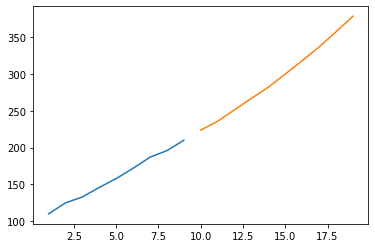

In [25]:
plt.plot(t1,data)
plt.plot(t2,output_predlist)